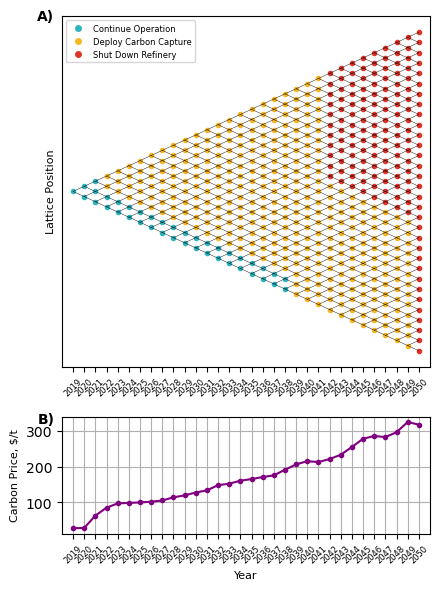

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Load the CSV file
lattice_df = pd.read_csv(r'C:\Users\file_location\Figure S14_RO_SampleLattice.csv')
# Load the carbon price trajectory data
carbon_df = pd.read_csv(r'C:\Users\file_location\Figure S14_RO_SampledLattice_CarbonTrajectorySample.csv')

# Create a figure with GridSpec for vertically aligned subplots
fig = plt.figure(figsize=(4.5, 6))
gs = GridSpec(2, 1, height_ratios=[3, 1])  # Different height ratios for each subplot

# Plot the Binomial Lattice on the first subplot
ax1 = fig.add_subplot(gs[0])

# Extract years from the lattice data
years = lattice_df.columns.astype(int).tolist()

# Define lattice positions and node labels
positions = {}
node_labels = {}

# Define spacing for equilateral triangle
x_spacing = 1  # Base unit for horizontal spacing
y_spacing = x_spacing * (np.sqrt(3) / 2)  # Vertical spacing for equilateral triangle

# Assign positions for binomial lattice
for row_index, row in lattice_df.iterrows():
    for col_index, node in enumerate(row):
        if pd.notna(node):
            x_position = col_index * x_spacing
            y_position = -row_index * y_spacing + (col_index * y_spacing / 2)  # Adjust vertically to expand downward
            positions[(row_index, col_index)] = (x_position, y_position)
            node_labels[(x_position, y_position)] = node

# Color map for node labels
color_map = {
    'Continue Operation': '#2cb5c0',
    'Deploy Carbon Capture': '#f8b620',
    'Shut Down Refinery': '#e03426'
}

# Assign colors based on node labels
node_colors = [color_map.get(label, 'black') for label in node_labels.values()]

# Plot nodes for the binomial lattice with reduced size
for (x, y), color in zip(node_labels.keys(), node_colors):
    ax1.plot(x, y, 'o', color=color, markersize=3)  # Reduce marker size

# Draw edges between nodes
for (row, col), (x, y) in positions.items():
    # Connect to the right-up node
    if (row, col + 1) in positions:
        x_next, y_next = positions[(row, col + 1)]
        ax1.plot([x, x_next], [y, y_next], 'k-', lw=0.3)  # Reduce line width

    # Connect to the right-down node
    if (row + 1, col + 1) in positions:
        x_next, y_next = positions[(row + 1, col + 1)]
        ax1.plot([x, x_next], [y, y_next], 'k-', lw=0.3)  # Reduce line width

# Configure the binomial lattice plot appearance
ax1.set_title(None)
ax1.set_xticks(np.arange(0, len(years)) * x_spacing)
ax1.set_xticklabels(years, rotation=45, fontsize=6)
ax1.set_xlim(-1, (len(years) - 1) * x_spacing + 1)
ax1.set_ylabel('Lattice Position', fontsize=8)
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Continue Operation', markerfacecolor='#2cb5c0', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Deploy Carbon Capture', markerfacecolor='#f8b620', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Shut Down Refinery', markerfacecolor='#e03426', markersize=6)
], loc='upper left', fontsize=6)
ax1.grid(False)
ax1.set_yticks([])  # Remove y-axis ticks from binomial lattice
ax1.text(-0.02, 1.02, 'A)', transform=ax1.transAxes, fontsize=10, fontweight='bold', va='top', ha='right')  # Panel label

# Plot the Carbon Price Trajectory on the second subplot
ax2 = fig.add_subplot(gs[1])

# Plot the Carbon Price Trajectory
ax2.plot(carbon_df['Year'], carbon_df['Carbon Price'], marker='o', linestyle='-', color='purple', markersize=3)
ax2.set_xlabel('Year', fontsize=8)
ax2.set_ylabel('Carbon Price, $/t', fontsize=8)
ax2.set_title(None)
ax2.grid(True)
ax2.set_xticks(carbon_df['Year'])  # Set xticks based on the carbon price trajectory data
ax2.set_xticklabels(carbon_df['Year'], rotation=45, fontsize=6)
ax2.set_xlim(2018, 2051)
ax2.text(-0.02, 1.04, 'B)', transform=ax2.transAxes, fontsize=10, fontweight='bold', va='top', ha='right')  # Panel label

plt.tight_layout()

# Save the figure as a PNG file with the specified size and resolution
plt.savefig(r'C:\Users\file_location\Figure_3.png', dpi=600, bbox_inches='tight', format='png')
plt.show()


In [50]:
lattice_df


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Continue Operation,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
1,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
2,NaN,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
3,NaN,NaN,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
4,NaN,NaN,NaN,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
5,NaN,NaN,NaN,NaN,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
6,NaN,NaN,NaN,NaN,NaN,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continue Operation,Continue Operation,Deploy Carbon Capture,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continue Operation,Continue Operation,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continue Operation,...,Deploy Carbon Capture,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery,Shut Down Refinery
